# Sensorless Drive Diagnosis Project

#### Purpose of the project
To build a multi-class classification model with numerical attributes

#### About the dataset
Dataset used in the analysis: Sensorless Drive Diagnosis dataset

https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis 

The dataset contains features extracted from electric current drive signals.

There are 48 continous predictive features. The target feature contains 11 classes. 






SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Sensorless Drive Diagnosis is a multi-class classification situation where we are trying to predict one of the several possible outcomes.

INTRODUCTION: The dataset contains features extracted from electric current drive signals. The drive has both intact and defective components. The signals can result in 11 different classes with different conditions. Each condition has been measured several times by 12 different operating conditions, such as speeds, load moments, and load forces.

In this iteration, we will establish the baseline accuracy measurement for comparison with future rounds of modeling.

ANALYSIS: The baseline performance of the machine learning algorithms achieved an average accuracy of 84.65%. Two algorithms (Random Forest and Extra Trees) achieved the top accuracy metrics after the first round of modeling. After a series of tuning trials, Extra Trees turned in the top overall result and achieved an accuracy metric of 99.95%. After applying the optimized parameters, the Extra Trees algorithm processed the testing dataset with an accuracy of 99.97%, which was even better than the prediction from the training data.

CONCLUSION: For this iteration, the Extra Trees algorithm achieved the best overall training and validation results. For this dataset, Extra Trees could be considered for further modeling.

### Load Libraries And Modules

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1) 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
import xgboost as xgb

### Load Dataset

In [3]:
df = pd.read_csv("sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)
header_names = ['feat' + str(i) for i in range(df.shape[1]-1)]
header_names.append('class')
df.set_axis(header_names, axis=1, inplace=True)
display(df.head())
display(df.tail())

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
58504,-0.000010,0.000002,-0.000021,0.000021,-0.000006,-0.000098,-0.083417,-0.083419,-0.083398,-0.18234,...,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.4933,-1.4933,11
58505,-0.000011,0.000020,0.000031,-0.000018,-0.000106,0.000292,-0.085131,-0.085151,-0.085182,-0.18432,...,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.4925,-1.4926,11
58506,-0.000006,0.000019,-0.000102,-0.000003,0.000004,0.000117,-0.081989,-0.082008,-0.081906,-0.18614,...,-0.51103,20.9250,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.4912,-1.4910,11
58507,-0.000004,0.000034,-0.000442,0.000005,0.000007,0.000087,-0.081500,-0.081534,-0.081093,-0.18363,...,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.4932,-1.4931,11
58508,-0.000009,0.000052,0.000072,0.000010,0.000004,-0.000032,-0.083034,-0.083086,-0.083159,-0.18589,...,-0.50974,1.6026,4.5773,-1.5039,-1.5040,-1.5036,-1.4945,-1.4946,-1.4943,11


### Basic EDA

In [4]:
display(df.describe())

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686,6.000000
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175,3.162305
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
feat0     58509 non-null float64
feat1     58509 non-null float64
feat2     58509 non-null float64
feat3     58509 non-null float64
feat4     58509 non-null float64
feat5     58509 non-null float64
feat6     58509 non-null float64
feat7     58509 non-null float64
feat8     58509 non-null float64
feat9     58509 non-null float64
feat10    58509 non-null float64
feat11    58509 non-null float64
feat12    58509 non-null float64
feat13    58509 non-null float64
feat14    58509 non-null float64
feat15    58509 non-null float64
feat16    58509 non-null float64
feat17    58509 non-null float64
feat18    58509 non-null float64
feat19    58509 non-null float64
feat20    58509 non-null float64
feat21    58509 non-null float64
feat22    58509 non-null float64
feat23    58509 non-null float64
feat24    58509 non-null float64
feat25    58509 non-null float64
feat26    58509 non-null float64


In [6]:
df.isna().sum().sum()

0

In [7]:
df.groupby('class').size()

class
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
dtype: int64

In [8]:
X = df.drop(['class'], axis=1)
y = df['class']

### Data Visulaizations

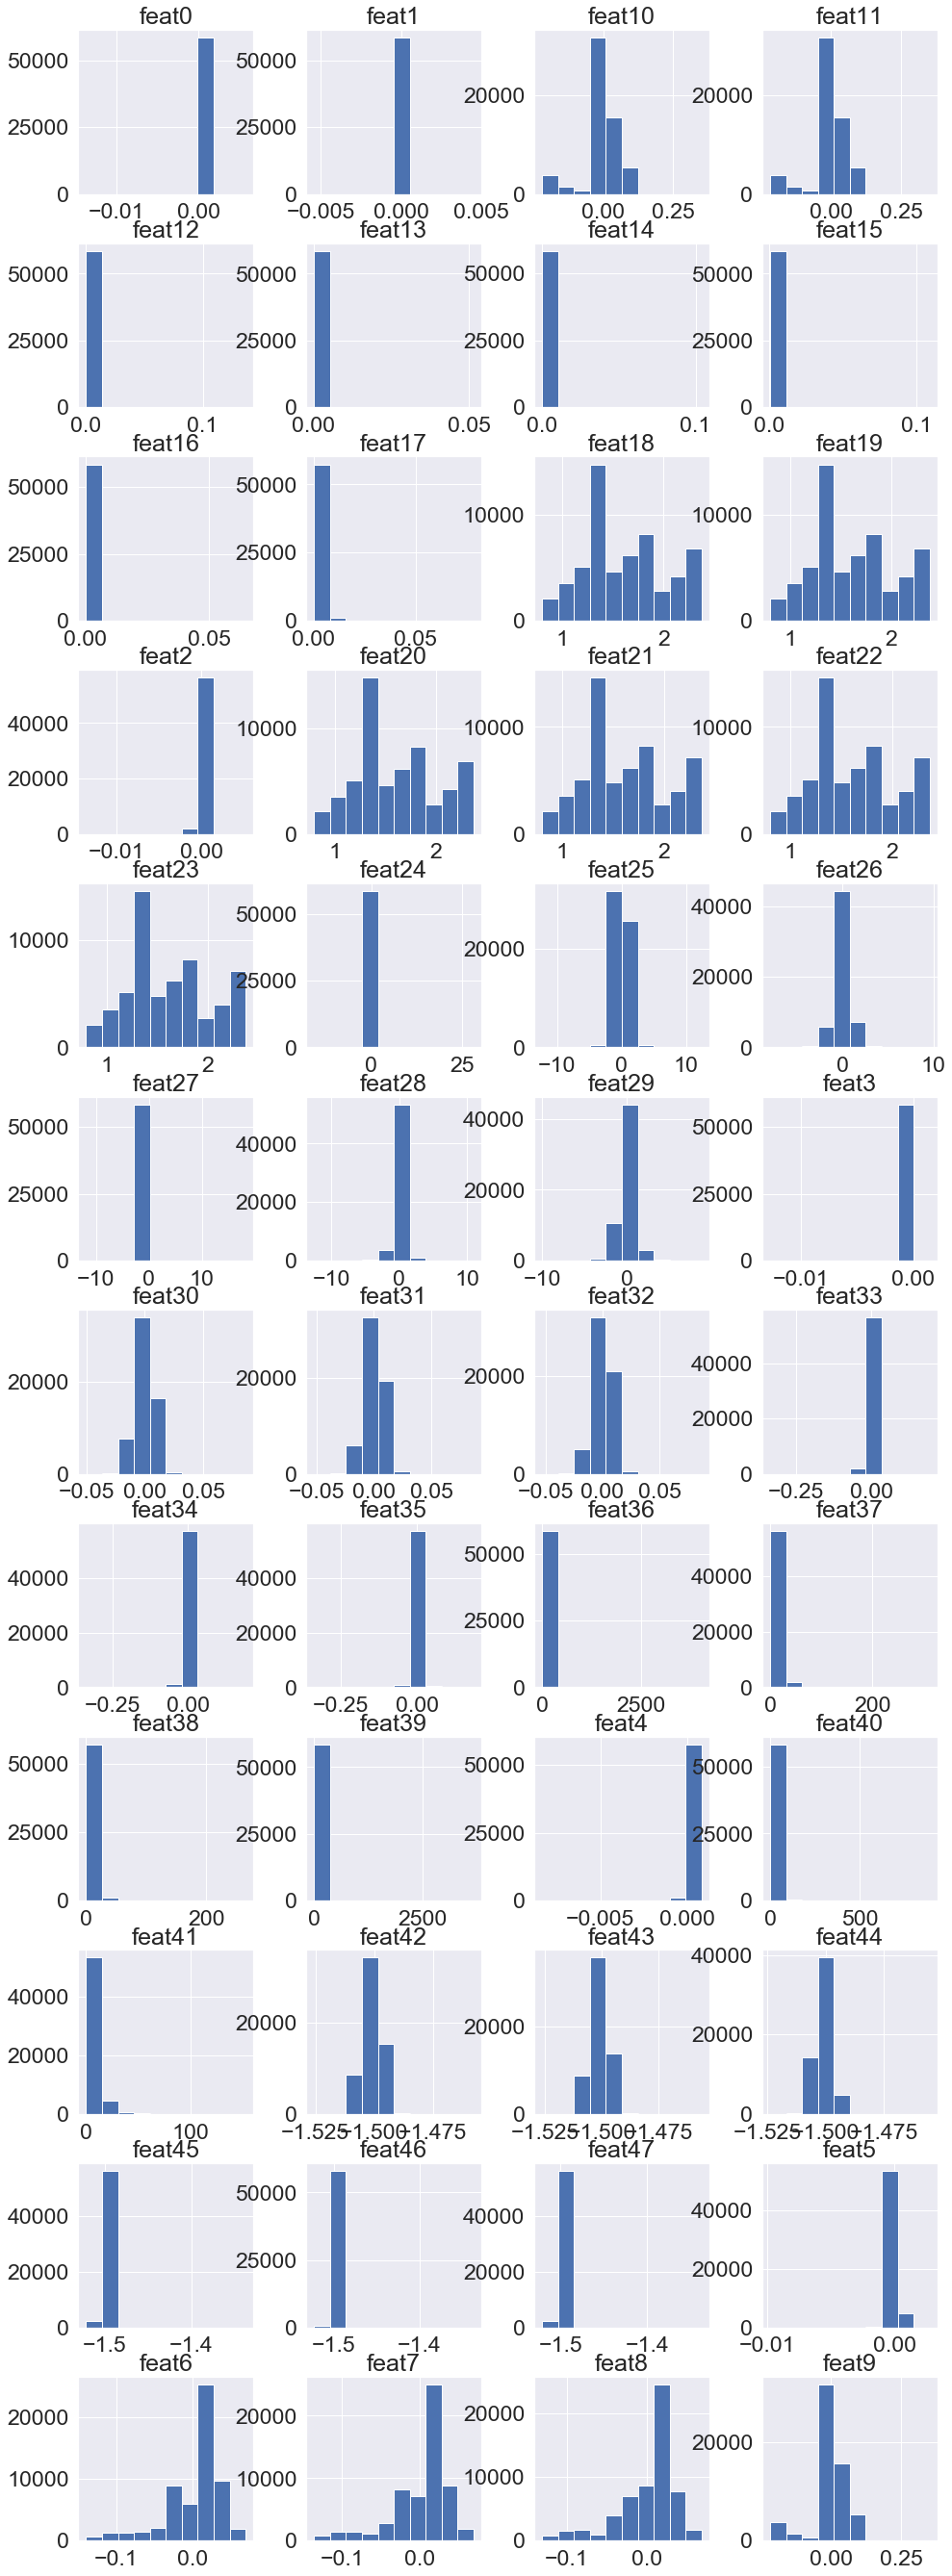

In [20]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 48
plt.rcParams["figure.figsize"] = fig_size
# plt.figure(figsize=(16,48))
X.hist(layout=(12,4))
plt.show()


### Splitting The Data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_x_train, columns=X_train.columns)

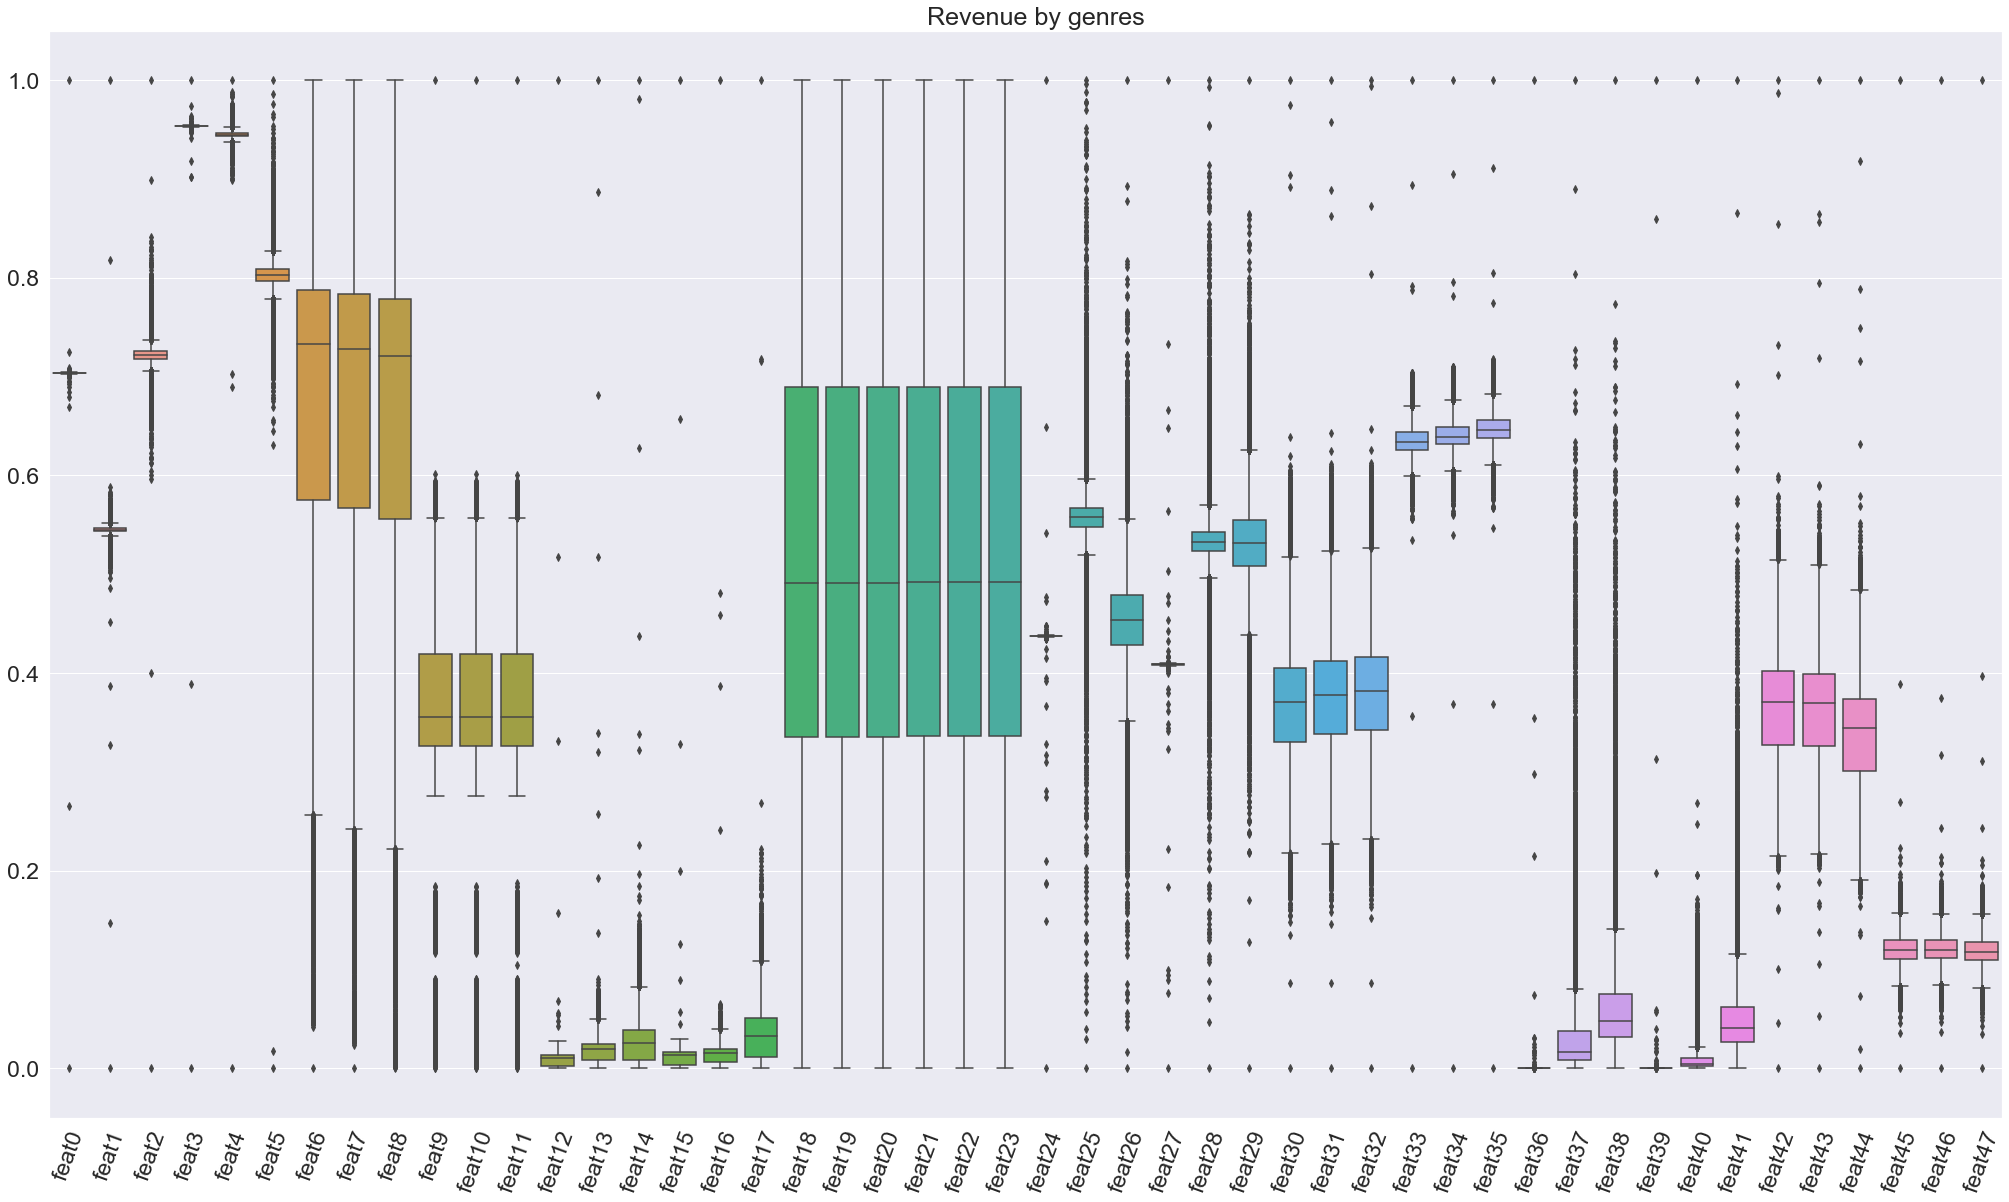

In [46]:
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1)  # Set font scale   
g = sns.boxplot(data=scaled_X_train)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('   Revenue by genres');

In [ ]:
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1)  # Set font scale   
g = sns.boxplot(data=X_train)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title(' ');

In [ ]:
sns.lineplot

In [39]:
clf = xgb.XGBClassifier(objective='multi:softmax',
                        nthread=4,
                        scale_pos_weight=3,
                        seed=42,
                        max_depth=3,
                        n_estimators=140,
                        learning_rate=0.05,
                        )
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)



In [40]:
accuracy_score(y_train, y_pred_train)

0.9830580896019826

In [44]:
para_tunning = {
        'learning_rate': [0.01,0.05,0.1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": [100, 200, 300, 400, 500],
        "objective": "multi:softmax",
        "alpha":[0,2,4,6,8]
        }

clf_rndcv = RandomizedSearchCV(clf, 
                         param_distributions = para_tunning,
                         cv = 5,  
                         n_iter = 5,
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,
                         random_state = 42)
clf_rndcv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 73.8min remaining: 23.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 95.7min finished


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(learning_rate=0.05, n_estimators=140,
                                           nthread=4,
                                           objective='multi:softprob',
                                           scale_pos_weight=3, seed=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [0, 2, 4, 6, 8],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'objective': 'multi:

In [50]:
print ( clf_rndcv.cv_results_['mean_train_score'])
print ( clf_rndcv.cv_results_['mean_test_score'])
print (clf_rndcv.best_estimator_)

KeyError: 'mean_train_score'

In [56]:
clf_rndcv.cv_results_

{'mean_fit_time': array([1239.2607192 , 3062.67594199, 1573.63412299,  765.88789277,
        1527.05709767]),
 'std_fit_time': array([ 13.06236412,  66.11060833,  97.54703485,  16.35042863,
        118.0639516 ]),
 'mean_score_time': array([2.04076691, 4.93415184, 2.82610803, 1.46265416, 1.30098248]),
 'std_score_time': array([0.11625217, 2.00052337, 0.2313909 , 0.19266019, 0.16644153]),
 'param_subsample': masked_array(data=[1.0, 0.8, 0.8, 1.0, 0.6],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_objective': masked_array(data=['u', 'u', 'a', 'o', ':'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300, 500, 300, 100, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[5, 1, 5, 1, 5],
              mask=[False

In [53]:
clf_rndcv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_subsample', 'param_objective', 'param_n_estimators', 'param_min_child_weight', 'param_max_depth', 'param_learning_rate', 'param_gamma', 'param_colsample_bytree', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [64]:
clf_rndcv.cv_results_['mean_test_score'].mean()

0.9957100691001844

In [57]:
clf_rndcv.best_estimator_

XGBClassifier(alpha=6, colsample_bytree=0.6, gamma=1.5, max_depth=6,
              n_estimators=500, nthread=4, objective='multi:softprob',
              scale_pos_weight=3, seed=42, subsample=0.8)

In [60]:
clf = xgb.XGBClassifier(alpha=6, colsample_bytree=0.6, gamma=1.5, max_depth=6,
              n_estimators=500, nthread=4, objective='multi:softmax',
              scale_pos_weight=3, seed=42, subsample=0.8)


In [61]:
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [65]:
accuracy_score(y_train, y_pred_train)

0.9998718140449078

### Splitting The Data 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Random Forest Classification Model

In [9]:
clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=42, n_estimators= 80)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [10]:
accuracy_score(y_train, y_pred_train)

1.0

In [11]:
round(accuracy_score(y_test, y_pred_test), 6)

0.999145

In [12]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4245
           2       1.00      1.00      1.00      4230
           3       1.00      1.00      1.00      4275
           4       1.00      1.00      1.00      4271
           5       1.00      1.00      1.00      4253
           6       1.00      1.00      1.00      4262
           7       1.00      1.00      1.00      4216
           8       1.00      1.00      1.00      4290
           9       1.00      1.00      1.00      4307
          10       1.00      1.00      1.00      4247
          11       1.00      1.00      1.00      4211

    accuracy                           1.00     46807
   macro avg       1.00      1.00      1.00     46807
weighted avg       1.00      1.00      1.00     46807



In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1074
           2       1.00      1.00      1.00      1089
           3       1.00      1.00      1.00      1044
           4       1.00      1.00      1.00      1048
           5       1.00      1.00      1.00      1066
           6       1.00      1.00      1.00      1057
           7       1.00      1.00      1.00      1103
           8       1.00      1.00      1.00      1029
           9       1.00      1.00      1.00      1012
          10       1.00      1.00      1.00      1072
          11       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702



In [14]:
print(confusion_matrix(y_train, y_pred_train), '\n')
print(confusion_matrix(y_test, y_pred_test), '\n')

[[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4230    0    0    0    0    0    0    0    0    0]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4271    0    0    0    0    0    0    0]
 [   0    0    0    0 4253    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    0    0    0    0    0    0 4290    0    0    0]
 [   0    0    0    0    0    0    0    0 4307    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 

[[1073    0    0    0    0    1    0    0    0    0    0]
 [   0 1088    0    0    0    0    0    0    1    0    0]
 [   0    0 1044    0    0    0    0    0    0    0    0]
 [   0    0    0 1048    0    0    0    0    0    0    0]
 [   0    0    3    0 1062    0    0    1    0    0    0]
 [   0    0    0    0    0 1057    0    0    0    0    0]
 [   0    0

In [23]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20, 15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.title('Compariosn of Feature Importances')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

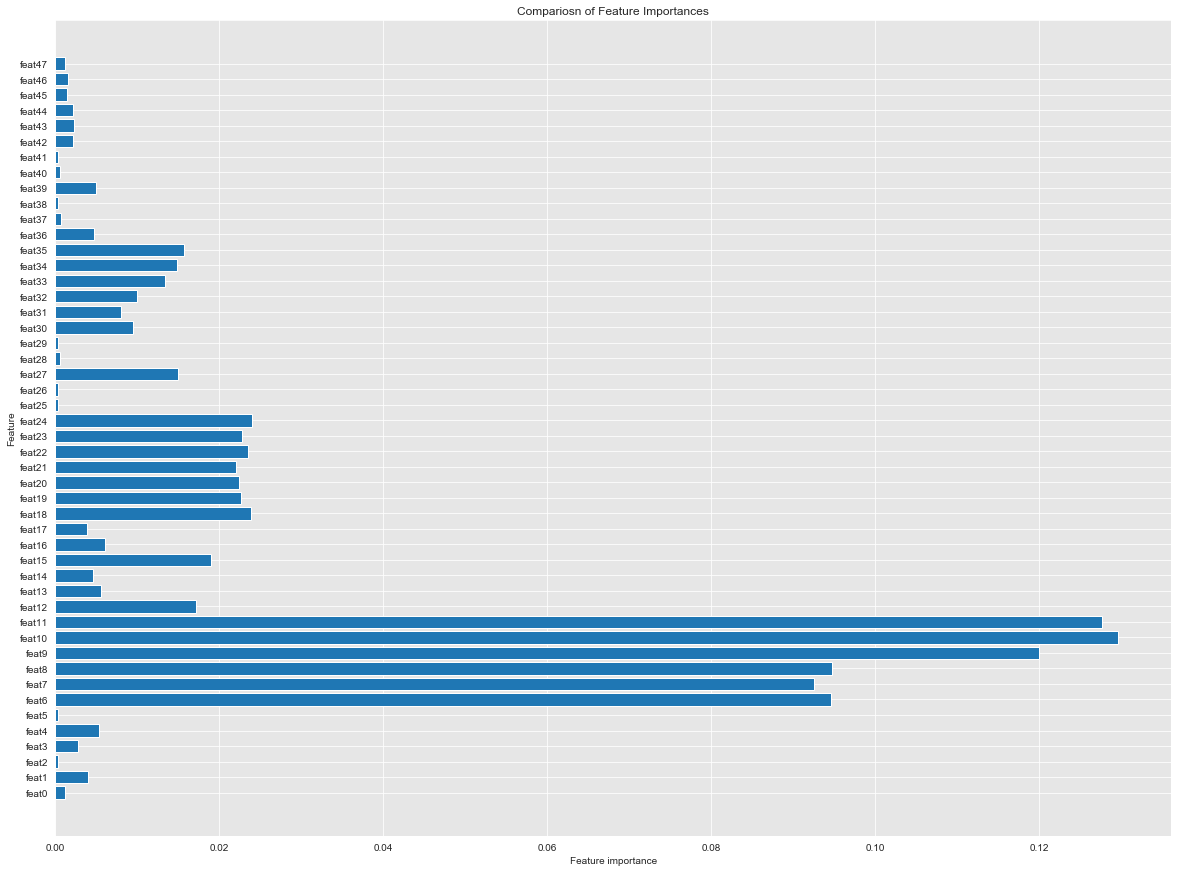

In [24]:
plot_feature_importances(clf)

In [30]:
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])

In [29]:
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[10, 20, 50, 100, 150, 200],
         'classifier__max_depth': [3, 4, 5, 6, 7],
         'classifier__min_samples_split': [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'classifier__class_weight':['balanced']}]

In [ ]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
clf.cv_results_

### XG Boost Classification Model

In [ ]:
clf = xgb.XGBClassifier(objective='multi:softprob',
                        nthread=4,
                        scale_pos_weight=3,
                        seed=42,
                        max_depth=3,
                        n_estimators=140,
                        learning_rate=0.05,
                        )
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# objective='multi:softmax'

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
training_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
cross_val_score(adaboost_clf, df, target, cv=5).mean()